In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
%precision 4
%matplotlib inline

In [359]:
import matplotlib as mpl
mpl.get_configdir()

'/Users/yugi/.matplotlib'

#### 練習問題4-4

In [17]:
mean = []
for i in range(10000):
    samples = stats.norm.rvs(loc=0, scale=1,size=100)
    mean.append(samples.mean())

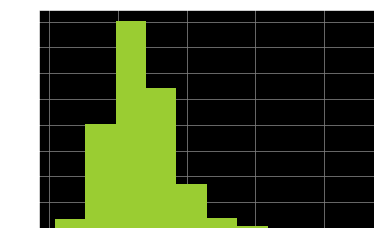

In [19]:
_ = plt.hist(mean)

#### 練習問題 4-5

In [28]:
mean = []
for i in range(10000):
    samples = stats.lognorm.rvs(loc=0.0, s=1,size=100)
    mean.append(samples.mean())

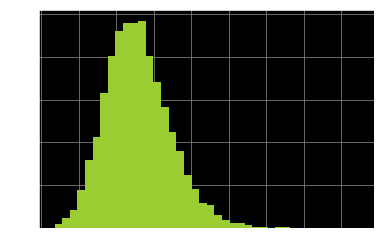

In [29]:
_ = plt.hist(mean, bins=40)

#### 練習問題 4-6

In [33]:
df = pd.read_csv('./student-mat.csv', sep=';')

In [34]:
data = np.array(df['G1'])

In [38]:
x = np.linspace(data.min() - data.min()*0.1, data.max() + data.max()*0.1, 100)

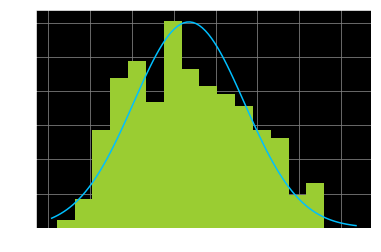

In [63]:
plt.hist(data, bins=15,density=True)
plt.plot(x, stats.norm.pdf(x, loc=data.mean(), scale=data.std()))

#### 練習問題4-7

In [64]:
samples = stats.chi2?

In [65]:
samples = stats.chi2.rvs?

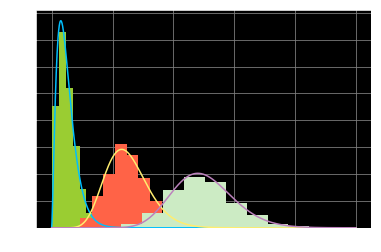

In [70]:
dfs = [5, 25, 50]
x = np.linspace(0,100, 1000)
for df in dfs:
    plt.hist(stats.chi2.rvs(loc=0, scale=1, df=df, size=1000), density=True)
    plt.plot(x, stats.chi2.pdf(x, loc=0, scale=1, df=df))

#### 練習問題 4-8

/Users/yugi/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1591: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


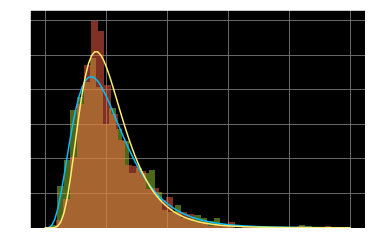

In [79]:
dfs = [[10,30],[20,25]]
x = np.linspace(0,5, 100)
for df in dfs:
    plt.hist(stats.f.rvs(loc=0, scale=1, dfn=df[0], dfd=df[1], size=1000), bins=40,density=True, alpha=0.5)
    plt.plot(x, stats.f.pdf(x, loc=0, scale=1, dfn=df[0], dfd=df[1]))

#### 練習問題 4-11

In [81]:
def func(x):
    return x**3 * (1-x)**2

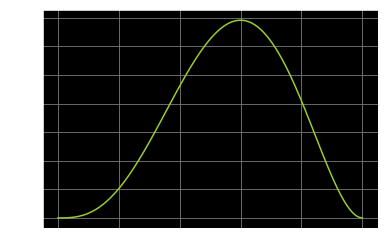

In [82]:
x = np.linspace(0,1,100)
plt.plot(x, func(x))

In [85]:
sample = func(x)
x[sample.argmax()]

0.595959595959596

#### 練習問題 4-13

In [301]:
df_por = pd.read_csv('./student-por.csv', sep=';')
df_mat = pd.read_csv('./student-mat.csv', sep=';')

In [303]:
df_merge = pd.merge(df_por, df_mat, on = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason','internet', 'nursery' ], how='inner', suffixes=('_por', '_mat'))

In [304]:
dataP = df_merge['G2_por']
dataM = df_merge['G2_mat']

In [333]:
# ２つのデータの差分をWeltch検定するAPI
_, p = stats.ttest_rel(dataP, dataM)

In [306]:
print("ポルトガル語平均値: {}".format(dataP.mean()))
print("数学平均値: {}".format(dataM.mean()))
print("P値: {}".format(p))

ポルトガル語平均値: 12.238219895287958
数学平均値: 10.712041884816754
P値: 4.0622824801348043e-19


In [334]:
# 先の検定と等価、equal_var = Falseでweltch検定
diff = dataP - dataM
stats.ttest_ind(diff, np.zeros(len(diff)), equal_var = False)

Ttest_indResult(statistic=9.431186078657428, pvalue=4.0622824801348043e-19)

In [335]:
# Weltch検定の実装
def independent_ttest(data1, data2):
    n1, n2 = len(data1), len(data2)
    mean1, mean2 = data1.mean(), data2.mean()
    std1, std2 = data1.std(ddof=1), data2.std(ddof=1)

    t = (mean1 - mean2) / np.sqrt(std1**2 / n1 + std2**2 / n2)
    df = (std1**2 / n1 + std2**2 / n2)**2 / (std1**4 /(n1**2 * (n1-1)) + std2**4 /(n2**2 * (n2-1)))
    p = stats.t.cdf(-np.abs(t), df)*2
    return t, p

In [336]:
independent_ttest(diff, np.zeros(len(diff)))

(9.431186078657422, 4.06228248013495e-19)

#### 総合問題4-1

In [339]:
df_por = pd.read_csv('./student-por.csv', sep=';')
df_mat = pd.read_csv('./student-mat.csv', sep=';')

In [340]:
df_merge = pd.merge(df_por, df_mat, on = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason','internet', 'nursery' ], how='inner', suffixes=('_por', '_mat'))

(array([220.,  99.,  22.,  16.,   8.,  11.,   4.,   0.,   0.,   2.]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <a list of 10 Patch objects>)

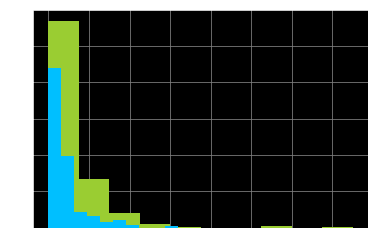

In [343]:
plt.hist(df_merge['absences_mat'])
plt.hist(df_merge['absences_por'])

In [344]:
stats.ttest_ind(df_merge['absences_mat'] - df_merge['absences_por'], 
                np.zeros(len(df_merge)),
               equal_var=False)

Ttest_indResult(statistic=4.794359243088911, pvalue=2.3441656888384195e-06)

In [346]:
stats.ttest_rel(df_merge['absences_mat'], df_merge['absences_por'])

Ttest_relResult(statistic=4.794359243088911, pvalue=2.3441656888384195e-06)

In [358]:
t, p = independent_ttest(df_merge['absences_mat'] - df_merge['absences_por'], 
                np.zeros(len(df_merge)))
print("P値: {}".format(p))

P値: 2.344165688838466e-06


P値 < 0.05 のため差があるといえる

#### 総合問題4-2

(array([102.,   0.,   0., 190.,   0.,   0.,  63.,   0.,   0.,  27.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

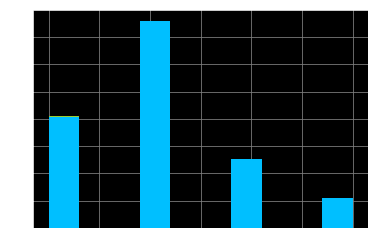

In [354]:
plt.hist(df_merge['studytime_mat'])
plt.hist(df_merge['studytime_por'])

In [356]:
t, p = independent_ttest(df_merge['studytime_mat'] - df_merge['studytime_por'], 
                np.zeros(len(df_merge)))

In [357]:
print("P値: {}".format(p))

P値: 0.5643842756976538


P値 > 0.05 のため差があるといえない